In [65]:
!git clone https://github.com/Kranium2002/meiro_task.git

fatal: destination path 'meiro_task' already exists and is not an empty directory.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import glob
from sklearn.feature_selection import SelectKBest,f_regression

###**Initial Preprocessing**

Loading all files

In [67]:
# Get a list of all JSON files in the directory
json_files = glob.glob('/content/meiro_task/DataJan2022Jul2023/*.json')

# Create an empty list to store individual DataFrames
dataframes = []

# Loop through each JSON file and load it into a DataFrame
for file in json_files:
    df = pd.read_json(file)
    dataframes.append(df)

# Merge all DataFrames into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

# Display the merged DataFrame
print(merged_df)

merged_df['startTime'] = pd.to_datetime(merged_df['startTime'])
merged_df['endTime'] = pd.to_datetime(merged_df['endTime'])

       driverId  tripId           startLocation  tripDistance  tripSpeed  \
0             1       0  [22.950475, 72.600508]           4.3      26.28   
1             1       1  [23.053141, 72.600997]           3.3      22.72   
2             1       2  [23.038868, 72.478913]           3.7      17.76   
3             1       3  [22.973294, 72.503798]           8.6      23.14   
4             1       4   [22.988351, 72.57377]           4.8      20.41   
...         ...     ...                     ...           ...        ...   
99012        19    2435  [22.959737, 72.514418]           6.3      26.02   
99013        19    2436  [22.994559, 72.484047]           1.6      21.84   
99014        19    2437  [22.960795, 72.533848]          12.7      25.88   
99015        19    2438  [23.005314, 72.519584]           7.4      21.96   
99016        19    2439  [22.961198, 72.612485]           2.6      21.71   

       tripDuration             endLocation            startTime  tripFare  \
0        

In [68]:
len(merged_df['driverId'].unique())

99

In [69]:
# Set 'startTime' as the index
merged_df.set_index('startTime', inplace=True)

In [70]:
merged_df['paymentType']=pd.get_dummies(merged_df['paymentType'])['cash']
#1-cash 0-upi

###**Trying to calculate demand only on the basis of number of drivers active within 15 minutes of time interval. This could be incorrect as demand is also based on an area so, another approach is used further.**

In [ ]:
# Resample the data using a 15-minute interval and count the number of trips
demand = merged_df.resample('15min').size()

In [ ]:
demand.values

array([ 1,  1,  0, ...,  9,  7, 14])

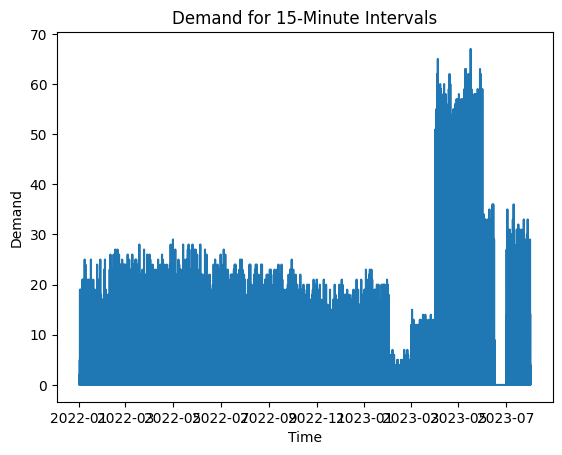

In [ ]:
# Plot the demand
plt.plot(demand)
plt.xlabel('Time')
plt.ylabel('Demand')
plt.title('Demand for 15-Minute Intervals')
plt.show()

In [ ]:
df = merged_df.resample('15min').mean()


<ipython-input-12-720fc0d77345>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = merged_df.resample('15min').mean()


In [ ]:
merged_df.sort_values(by='startTime').head()

,driverId,tripId,startLocation,tripDistance,tripSpeed,tripDuration,endLocation,tripFare,paymentType,endTime
startTime,,,,,,,,,,
2022-01-01 06:35:00,32,3915,"[23.026471, 72.559203]",4.6,21.84,13,"[23.050286, 72.596172]",52,0,2022-01-01 06:47:00
2022-01-01 06:59:00,4,372,"[22.967401, 72.539526]",12.1,20.41,36,"[23.076577, 72.539526]",127,1,2022-01-01 07:34:00
2022-01-01 07:41:00,36,4388,"[22.952247, 72.503346]",4.4,25.38,10,"[22.974687, 72.53816]",50,1,2022-01-01 07:51:00
2022-01-01 07:47:00,2,132,"[23.050909, 72.590623]",7.9,23.15,20,"[23.115559, 72.621921]",85,0,2022-01-01 08:07:00
2022-01-01 08:47:00,6,633,"[23.087811, 72.48291]",2.1,16.50,8,"[23.097227, 72.500642]",27,1,2022-01-01 08:54:00


In [ ]:
df.head(100)

,driverId,tripId,tripDistance,tripSpeed,tripDuration,tripFare,paymentType
startTime,,,,,,,
2022-01-01 06:30:00,32.000000,3915.000000,4.600000,21.840000,13.000000,52.000000,0.0
2022-01-01 06:45:00,4.000000,372.000000,12.100000,20.410000,36.000000,127.000000,1.0
2022-01-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 07:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 07:30:00,36.000000,4388.000000,4.400000,25.380000,10.000000,50.000000,1.0
...,...,...,...,...,...,...,...
2022-01-02 06:15:00,34.000000,4153.000000,3.100000,26.240000,7.000000,37.000000,1.0
2022-01-02 06:30:00,8.000000,869.000000,4.900000,17.710000,17.000000,55.000000,1.0
2022-01-02 06:45:00,29.400000,3560.200000,6.260000,21.724000,18.400000,68.600000,0.2


In [ ]:
df_cleaned = df.dropna()

In [ ]:
df_cleaned['demand']=demand

<ipython-input-17-eb218c014083>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['demand']=demand


In [ ]:
demand

,Zone,driverId
startTime,,
2022-01-01 06:30:00,65.0,1
2022-01-01 06:45:00,17.0,1
2022-01-01 07:30:00,19.0,1
2022-01-01 07:45:00,2.0,1
2022-01-01 08:45:00,40.0,2
...,...,...
2023-08-01 07:45:00,5.0,2
2023-08-01 08:00:00,19.0,4
2023-08-01 08:15:00,70.0,9


###**Trying to cluster rides into zones of cab pickup based on startLocation to calculate demand for a particular zone of area to calculate Zone based demand**

In [71]:
# Split the 'Location' column into separate 'X' and 'Y' columns
merged_df[['X', 'Y']] = merged_df['startLocation'].apply(lambda loc: pd.Series({'X': loc[0], 'Y': loc[1]}))


Using inertia to calculate best amount of clusters for the given dataset

In [ ]:
from tqdm import tqdm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

100%|██████████| 150/150 [45:28<00:00, 18.19s/it]


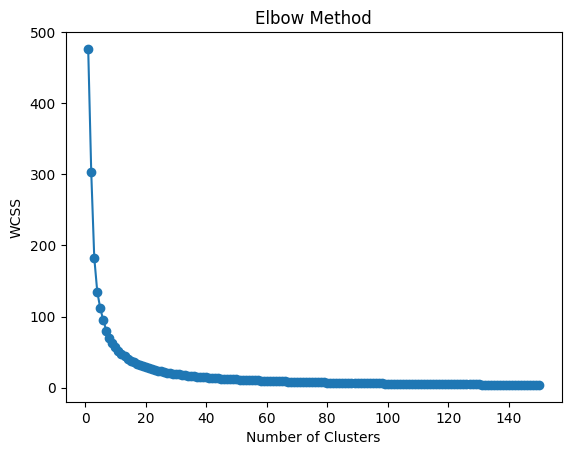

In [ ]:
# Calculate the within-cluster sum of squares (WCSS) for different cluster numbers
wcss = []
max_clusters = 150

for n_clusters in tqdm(range(1, max_clusters + 1)):
      kmeans = KMeans(n_clusters=n_clusters, random_state=42)
      kmeans.fit(merged_df[['X','Y']])
      wcss.append(kmeans.inertia_)

# Plot the number of clusters against the WCSS values
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In above graph we see that inertia stabilizes after 50 clusters so we use 50 clusters as optimum as it would mean we are dividing ahemdabad into area of approx 10km square for each zone

In [107]:
# Choose the optimal number of zones based on the Elbow Method
optimal_zones = 50  # Select the number of zones where the elbow occurs

# Fit the K-means clustering with the optimal number of zones
kmeans = KMeans(n_clusters=optimal_zones, random_state=42)
kmeans.fit(merged_df[['X','Y']])

# Assign the zone labels to the original DataFrame
merged_df['Zone'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [108]:
# Get the coordinates of the cluster centroids
centroids = kmeans.cluster_centers_

In [109]:
!pip install folium

In [110]:
import folium

In [111]:
x = centroids[:, 0]
y = centroids[:, 1]
loca = pd.DataFrame({'lat': x, 'lon': y})

In [112]:
len(loca)

50

In [113]:
map_new=folium.Map()
list_coor=loca[['lat','lon']].values.tolist()
for i in list_coor:
    map_new.add_child(folium.Marker(location=[i[0],i[1]],
                                popup=i[0],icon=folium.Icon(color='green')))
map_new

In [114]:
merged_df

,driverId,tripId,startLocation,tripDistance,tripSpeed,tripDuration,endLocation,tripFare,paymentType,endTime,X,Y,Zone
startTime,,,,,,,,,,,,,
2023-05-01 14:23:00,1,0,"[22.950475, 72.600508]",4.3,26.28,10,"[22.977525, 72.629892]",49,0,2023-05-01 14:32:00,22.950475,72.600508,29
2023-05-01 18:13:00,1,1,"[23.053141, 72.600997]",3.3,22.72,9,"[23.077102, 72.619235]",39,1,2023-05-01 18:21:00,23.053141,72.600997,37
2023-05-01 22:33:00,1,2,"[23.038868, 72.478913]",3.7,17.76,12,"[23.057751, 72.508226]",43,1,2023-05-01 22:45:00,23.038868,72.478913,43
2023-05-01 22:51:00,1,3,"[22.973294, 72.503798]",8.6,23.14,22,"[23.02796, 72.56321]",92,0,2023-05-01 23:13:00,22.973294,72.503798,4
2023-05-02 22:47:00,1,4,"[22.988351, 72.57377]",4.8,20.41,14,"[23.027855, 72.592882]",54,1,2023-05-02 23:01:00,22.988351,72.573770,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-30 22:20:00,19,2435,"[22.959737, 72.514418]",6.3,26.02,15,"[22.992455, 72.565189]",69,1,2023-03-30 22:34:00,22.959737,72.514418,38
2023-03-30 22:46:00,19,2436,"[22.994559, 72.484047]",1.6,21.84,4,"[23.004924, 72.495308]",22,1,2023-03-30 22:50:00,22.994559,72.484047,14
2023-03-30 22:49:00,19,2437,"[22.960795, 72.533848]",12.7,25.88,29,"[22.960747, 72.657887]",133,1,2023-03-30 23:18:00,22.960795,72.533848,40


In [115]:
# Group the data by zone and 15-minute interval, then count the number of unique driver IDs
df_final = merged_df.groupby(['Zone', pd.Grouper(freq='15T')]).agg({'driverId': pd.Series.nunique,'tripDistance':'mean','tripDuration':'mean'})

In [116]:
df_final = df_final.rename(columns={'driverId': 'ZoneDemand'})
df_final.reset_index(inplace=True)
len(df_final)

90080

In [117]:
df_final.sort_values('startTime').head(1000)

,Zone,startTime,ZoneDemand,tripDistance,tripDuration
40483,22,2022-01-01 06:30:00,1,4.6,13.0
37449,20,2022-01-01 06:45:00,1,12.1,36.0
68989,38,2022-01-01 07:30:00,1,4.4,10.0
65444,36,2022-01-01 07:45:00,1,7.9,20.0
75343,41,2022-01-01 08:45:00,1,9.2,33.0
...,...,...,...,...,...
30801,16,2022-01-08 07:15:00,1,4.4,12.0
25077,13,2022-01-08 07:30:00,1,2.6,6.0
78628,43,2022-01-08 07:45:00,1,4.6,14.0
80654,44,2022-01-08 07:45:00,1,5.5,19.0


In [118]:
# Extract relevant features from startTime
df_final['year'] = df_final['startTime'].dt.year
df_final['month'] = df_final['startTime'].dt.month
df_final['day_of_week'] = df_final['startTime'].dt.dayofweek
df_final['hour'] = df_final['startTime'].dt.hour
df_final['minute'] = df_final['startTime'].dt.minute
df_final['time'] = df_final['hour'] + df_final['minute'] / 60.0

# Convert categorical features using label encoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode day_of_week using LabelEncoder
df_final['day_of_week'] = label_encoder.fit_transform(df_final['day_of_week'])

In [119]:
df_final['hour']

0        21
1        21
2        22
3        18
4        20
         ..
90075    22
90076     8
90077    22
90078    22
90079     6
Name: hour, Length: 90080, dtype: int64

Checking which features except Distance, Time and Zone are to be included from the time format

In [5]:
X = df_final[['month','day_of_week','time']]
y = df_final['ZoneDemand']
selector = SelectKBest(score_func=f_regression, k=2)
selected_features = selector.fit_transform(X, y)
selected_columns = X.columns[selector.get_support()]

# Display the new DataFrame
print(selected_columns)

Index(['month', 'time'], dtype='object')


Taking final Features to be Zone, Distance, Duration, time of booking and month.

###**Machine Learning Models Section**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

In [7]:
#df_final.to_json('df_final.json',orient='records')

In [6]:
df_final = pd.read_json("/content/df_final.json")

In [8]:
df_final

,Zone,startTime,ZoneDemand,tripDistance,tripDuration,year,month,day_of_week,hour,minute,time
0,0,1641070800000,1,7.8,31.0,2022,1,5,21,0,21.00
1,0,1641073500000,1,12.7,37.0,2022,1,5,21,45,21.75
2,0,1641077100000,2,11.7,31.0,2022,1,5,22,45,22.75
3,0,1641146400000,1,9.8,34.0,2022,1,6,18,0,18.00
4,0,1641153600000,1,6.6,16.0,2022,1,6,20,0,20.00
...,...,...,...,...,...,...,...,...,...,...,...
90075,49,1690754400000,1,5.0,14.0,2023,7,6,22,0,22.00
90076,49,1690793100000,2,8.5,21.5,2023,7,0,8,45,8.75
90077,49,1690841700000,1,1.3,6.0,2023,7,0,22,15,22.25
90078,49,1690842600000,1,8.6,22.0,2023,7,0,22,30,22.50


In [9]:
X = df_final[['Zone','tripDistance','time','month']]
Y = df_final['ZoneDemand']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [11]:
y_test = y_test.values.astype('float32')

XGB Model

In [12]:
# Initialize and fit the logistic regression model
model = xgb.XGBRegressor()
model.fit(X_train, y_train.values)

# Predict the target variable for the test set
y_pred = model.predict(X_test).round()


y_pred

array([1., 1., 1., ..., 1., 2., 1.], dtype=float32)

In [13]:
# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
acc = accuracy_score(y_test, y_pred)

# Display the accuracy
print("Root Mean Squared Error:", rmse)
print("Accuracy:", acc)

Root Mean Squared Error: 0.26661763
Accuracy: 0.9464550029603316


Logistic Regression  (gives convergence warning therefore not a good choice)

In [14]:
# Initialize and fit the logistic regression model
model1 = LogisticRegression()
model1.fit(X_train, y_train.values)

# Predict the target variable for the test set
y_pred = model1.predict(X_test).round()

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9181098283007697


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Neural Network

In [15]:
from tensorflow import keras

In [16]:
features = ['Zone','tripDistance','time','month']

# Create a feedforward neural network model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(len(features),)),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
3941/3941 [==============================] - 20s 4ms/step - loss: 8.6124 - accuracy: 0.7235
Epoch 2/10
3941/3941 [==============================] - 14s 4ms/step - loss: 0.1434 - accuracy: 0.9089
Epoch 3/10
3941/3941 [==============================] - 16s 4ms/step - loss: 0.1270 - accuracy: 0.9133
Epoch 4/10
3941/3941 [==============================] - 14s 3ms/step - loss: 0.1256 - accuracy: 0.9136
Epoch 5/10
3941/3941 [==============================] - 14s 4ms/step - loss: 0.1252 - accuracy: 0.9136
Epoch 6/10
3941/3941 [==============================] - 14s 4ms/step - loss: 0.1253 - accuracy: 0.9137
Epoch 7/10
3941/3941 [==============================] - 14s 4ms/step - loss: 0.1252 - accuracy: 0.9136
Epoch 8/10
3941/3941 [==============================] - 14s 4ms/step - loss: 0.1251 - accuracy: 0.9136
Epoch 9/10
3941/3941 [==============================] - 14s 4ms/step - loss: 0.1252 - accuracy: 0.9137
Epoch 10/10
3941/3941 [==============================] - 14s 4ms/step - l

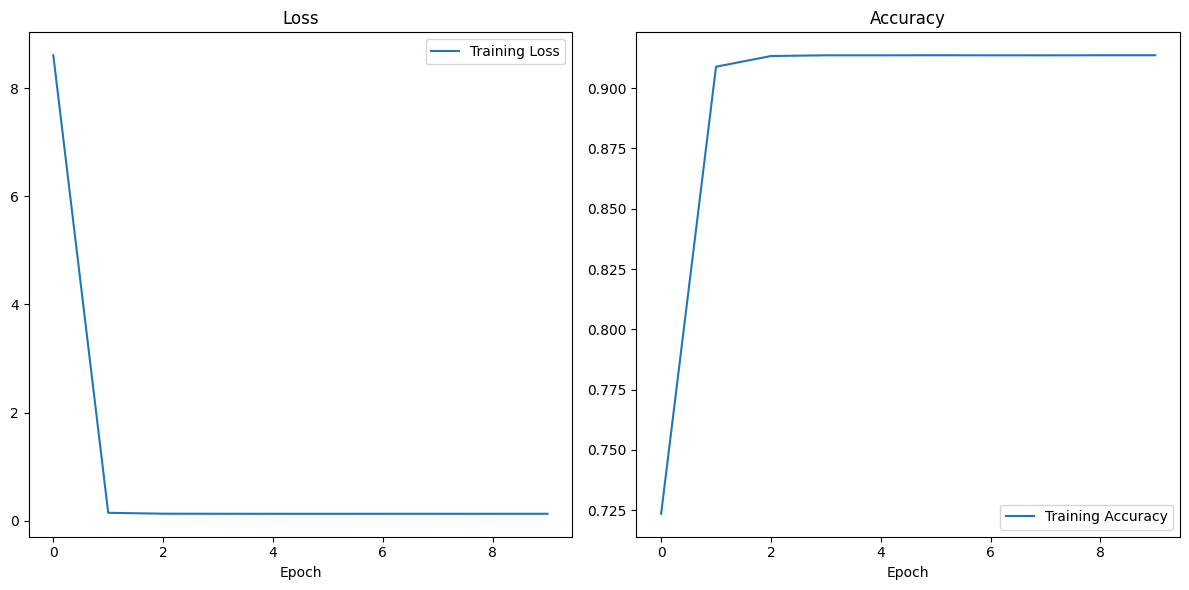

In [17]:
# Plot the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", loss)
print("Accuracy:", accuracy)

Loss: 0.11856061220169067
Accuracy: 0.9181098341941833
